Epoch 1/50
5/5 [==============================] - 3s 5ms/step - loss: 0.3010
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2771
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2526
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.2315
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2091
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1885
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1684
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1504
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1322
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1150
Epoch 11/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1010
Epoch 12/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0862
Epoch 13/50
5/5 [==============================] - 0s 5ms/step - loss: 0.

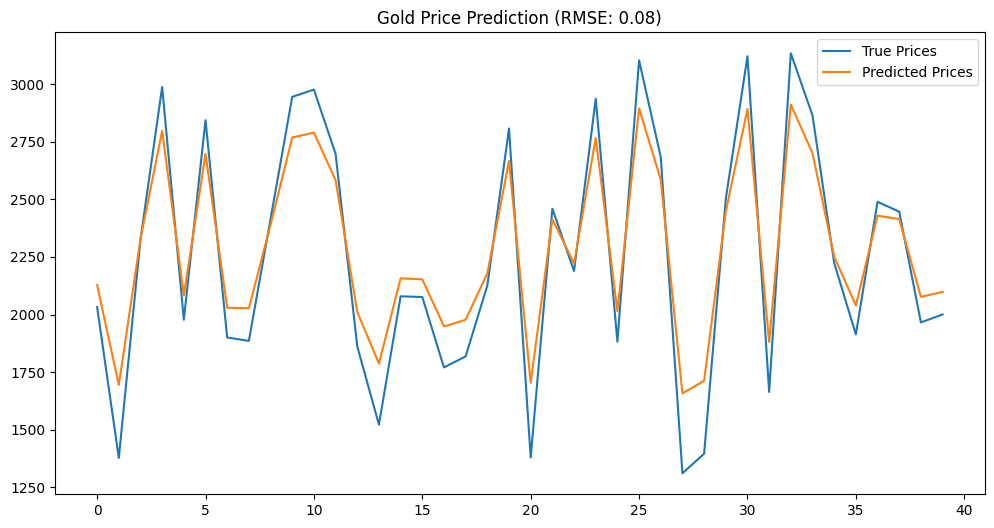

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Generate synthetic gold price data
np.random.seed(0)
days = np.arange(1, 201)
gold_prices = 1200 + 10 * days + np.random.randn(200) * 5

# Data preprocessing
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(gold_prices.reshape(-1, 1))

# Create sequences for training
X, y = prices_scaled[:-1], prices_scaled[1:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model architecture
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model training
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Model evaluation
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='True Prices')
plt.plot(scaler.inverse_transform(y_pred), label='Predicted Prices')
plt.title(f'Gold Price Prediction (RMSE: {rmse:.2f})')
plt.legend()
plt.show()